In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm  # Удобный progress bar для ноутбуков
import matplotlib.pyplot as plt
%matplotlib inline

# Эксперимент 1: сравнение времени работы

Можем посмотреть на данные результатов экспериментов:

In [2]:
a = pd.read_csv('results.csv')
a.head(100)

,id,start_x,start_y,start_theta,start_k,goal_x,goal_y,goal_theta,goal_k,baseline_success,baseline_time,baseline_params,baseline_steps,proposed_success,proposed_time,proposed_params,proposed_steps
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-1.0,True,0.081229,"-2.9712553455831747,11.876001971598361,-9.8890...",45,True,0.025265,"-0.03462710255471043,0.3464388092678574,0.0006...",26
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.523599,-1.0,True,0.070135,"-14.202692406495258,49.18494652536953,-35.0146...",46,True,0.039047,"-0.46618486777739016,2.1190850636930185,0.0399...",41
2,2,0.0,0.0,0.0,0.0,1.0,0.0,1.047198,-1.0,True,0.112350,"-20.44892122699565,63.61086606634846,-40.44063...",48,True,0.063123,"-0.7596544736335284,3.4970270416417564,0.14196...",47
3,3,0.0,0.0,0.0,0.0,1.0,0.0,1.570796,-1.0,True,0.149332,"-20.416002472202546,54.50344171128189,-29.5372...",53,True,0.094836,"-0.8331234963339351,4.249229966663338,0.301161...",50
4,4,0.0,0.0,0.0,0.0,1.0,0.0,2.094395,-1.0,True,0.181537,"-16.260647418000243,36.031057781395575,-16.037...",61,True,0.102004,"-0.6931292068306854,4.389795417022827,0.502913...",52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.0,0.0,0.0,1.0,1.0,0.0,2.094395,0.5,True,0.127344,"-23.567009517580544,49.87131427901622,-22.9137...",54,True,0.103581,"-1.1812202271470416,4.391076082810348,0.405015...",51
96,96,0.0,0.0,0.0,1.0,1.0,0.0,2.617994,0.5,True,0.147552,"-18.739562361250208,33.70417136065024,-13.0851...",61,True,0.109539,"-0.9766089774147352,4.380481327543983,0.577932...",53
97,97,0.0,0.0,0.0,1.0,1.0,0.0,-3.141593,0.5,True,0.187792,"2.7736821530749,-6.637757317994464,2.079851093...",76,True,0.117260,"-0.29720181373117754,-3.3604785388282132,0.972...",56
98,98,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,True,0.044706,"-5.970124175481165,6.00902398504586,-0.0437280...",46,True,0.030978,"-0.32312015306905045,-0.32298861017153446,0.00...",33


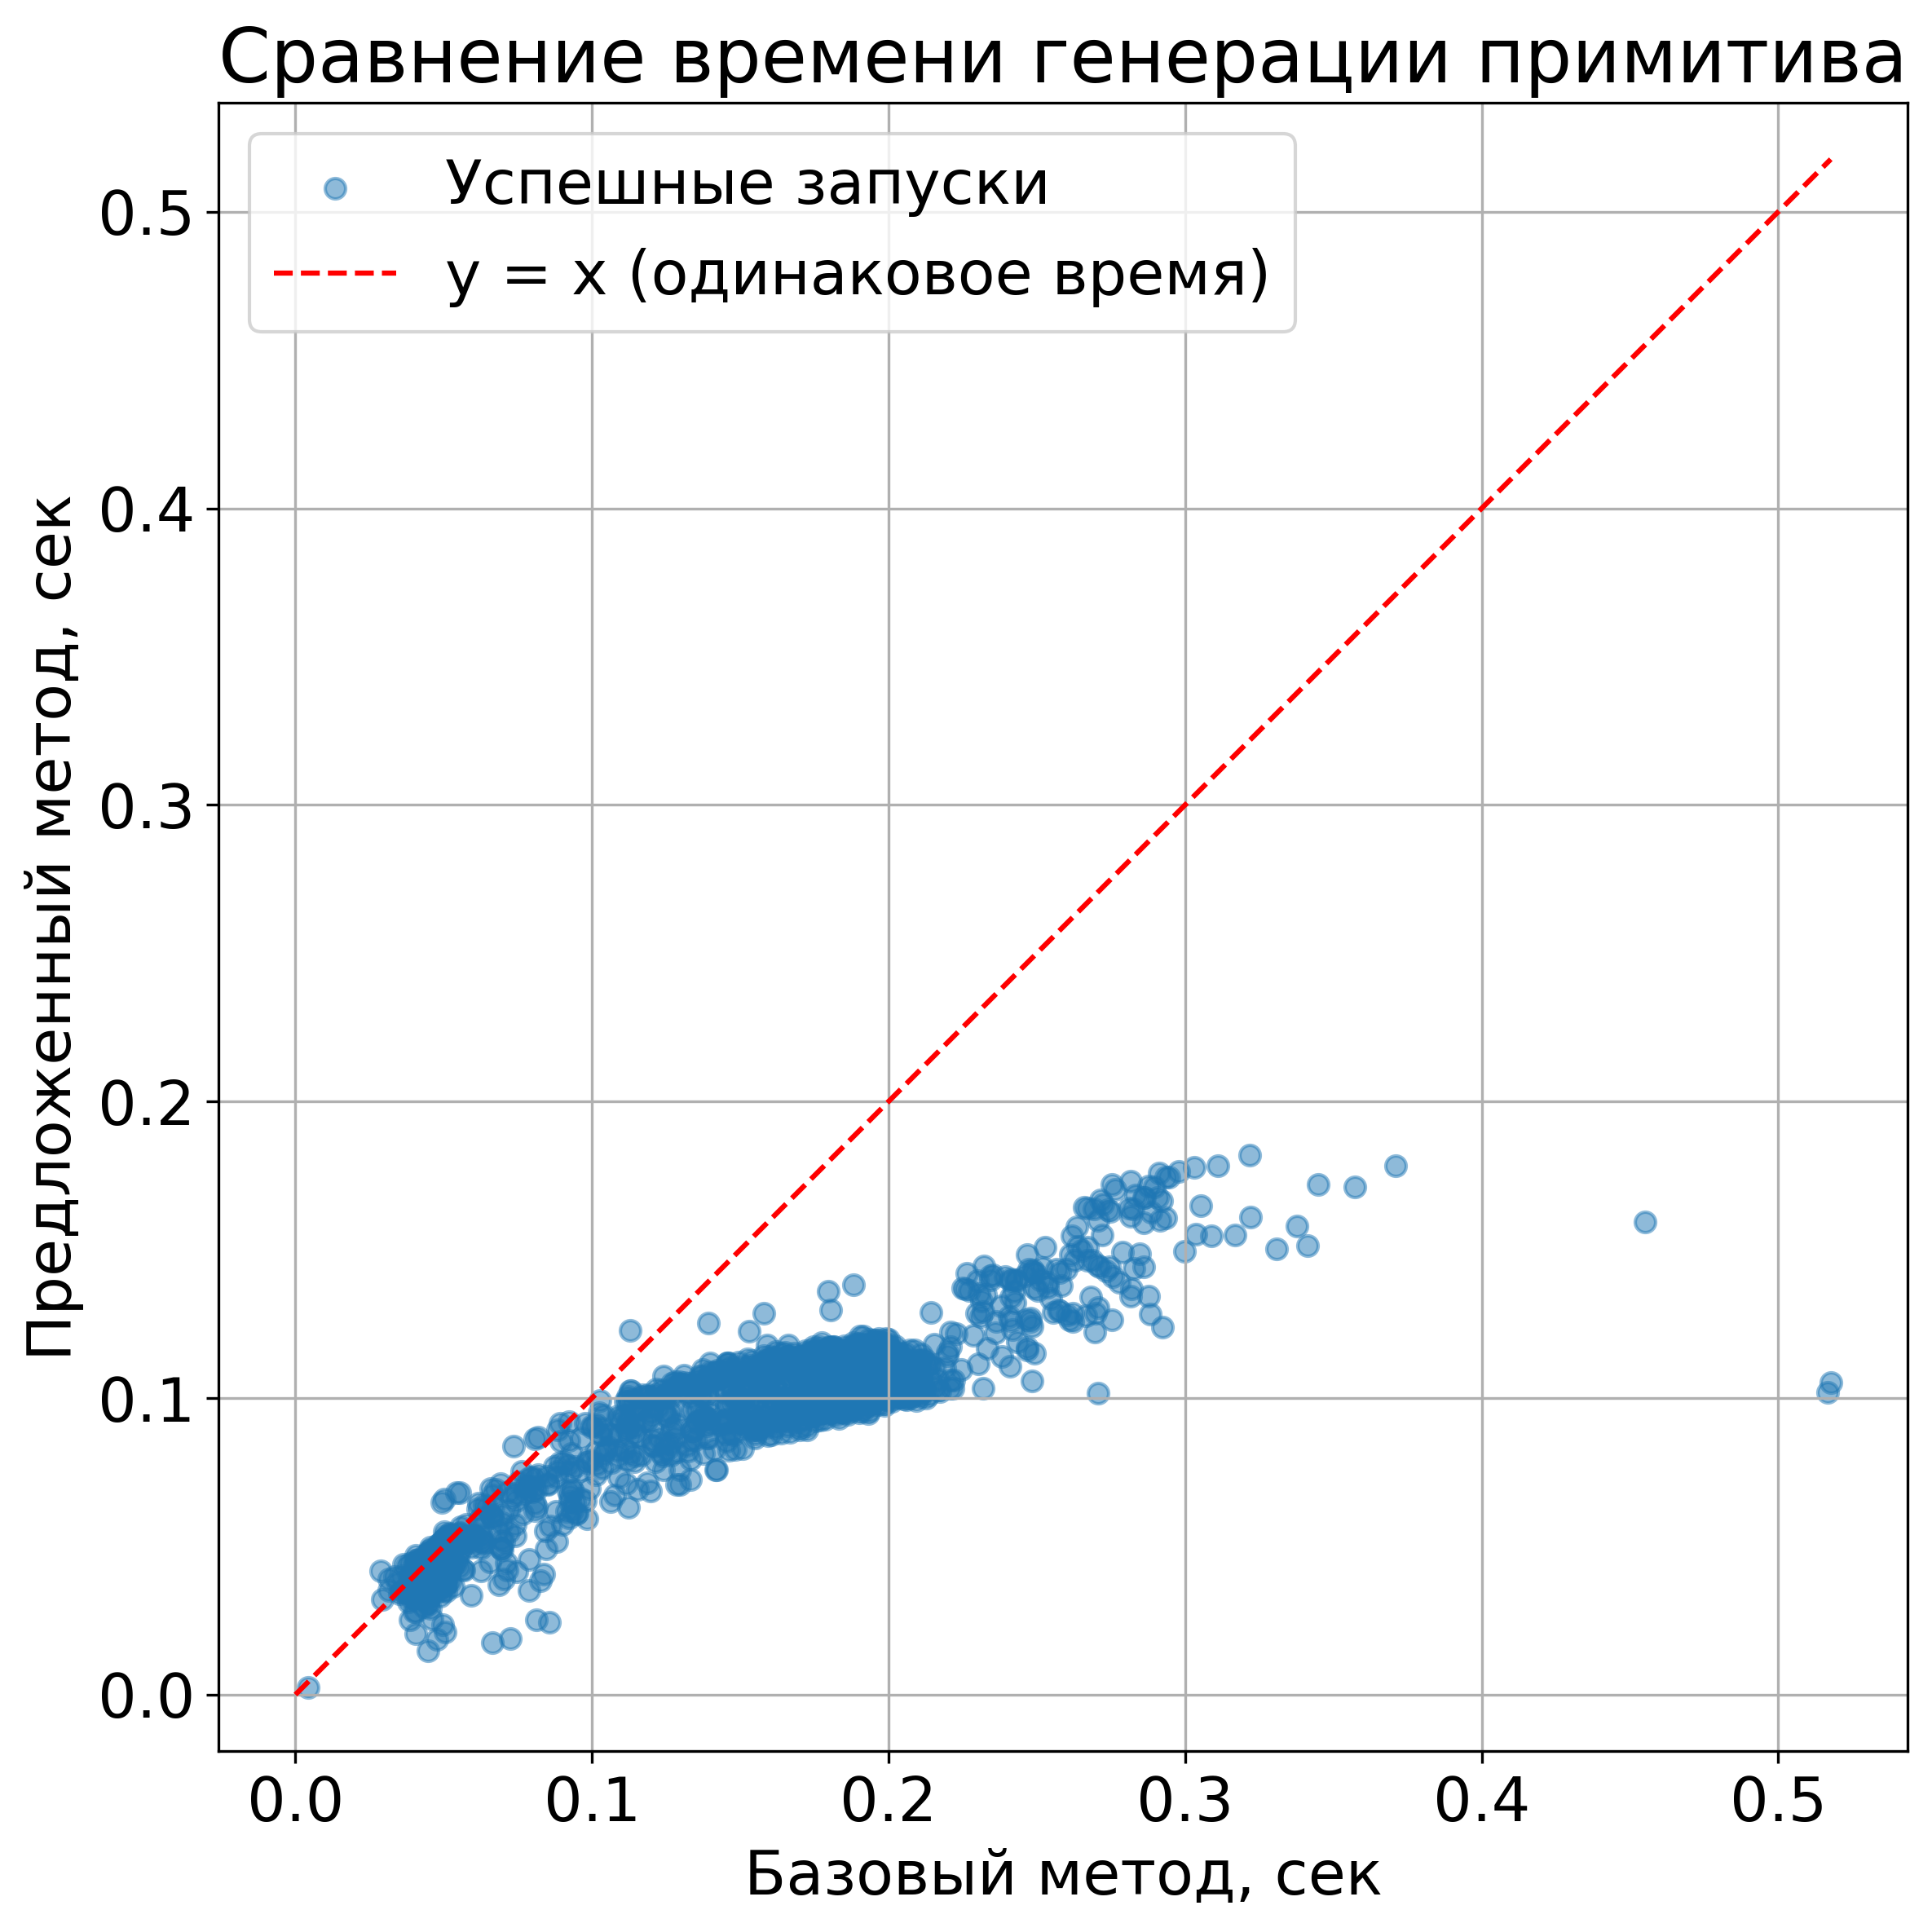

In [3]:
# Загружаем результаты
df = pd.read_csv('results.csv')

# --- График 1: Сравнение времени выполнения ---
plt.figure(figsize=(8, 8), dpi=300)
successful_runs = df[df['baseline_success'] & df['proposed_success']]

plt.scatter(successful_runs['baseline_time'], successful_runs['proposed_time'], alpha=0.5, label='Успешные запуски')
plt.plot([0, successful_runs['baseline_time'].max()], [0, successful_runs['baseline_time'].max()], 'r--', label='y = x (одинаковое время)')

# Увеличиваем размер шрифта для заголовка и подписей осей
plt.title('Сравнение времени генерации примитива', fontsize=22)
plt.xlabel('Базовый метод, сек', fontsize=18)
plt.ylabel('Предложенный метод, сек', fontsize=18)

# Увеличиваем размер чисел на осях (тиков)
plt.tick_params(axis='both', which='major', labelsize=18)

# Увеличиваем размер шрифта в легенде
plt.legend(fontsize=18)

plt.grid(True)
plt.axis('equal')

# Автоматически подгоняем элементы, чтобы они не перекрывались
plt.tight_layout()
# plt.savefig("comparison_time.png", dpi=300, bbox_inches="tight", facecolor='white')
plt.show()

# Эксперимент 2: карты достижимости

Данные из 'grid_results_corrected.csv' успешно загружены. Записей: 1200


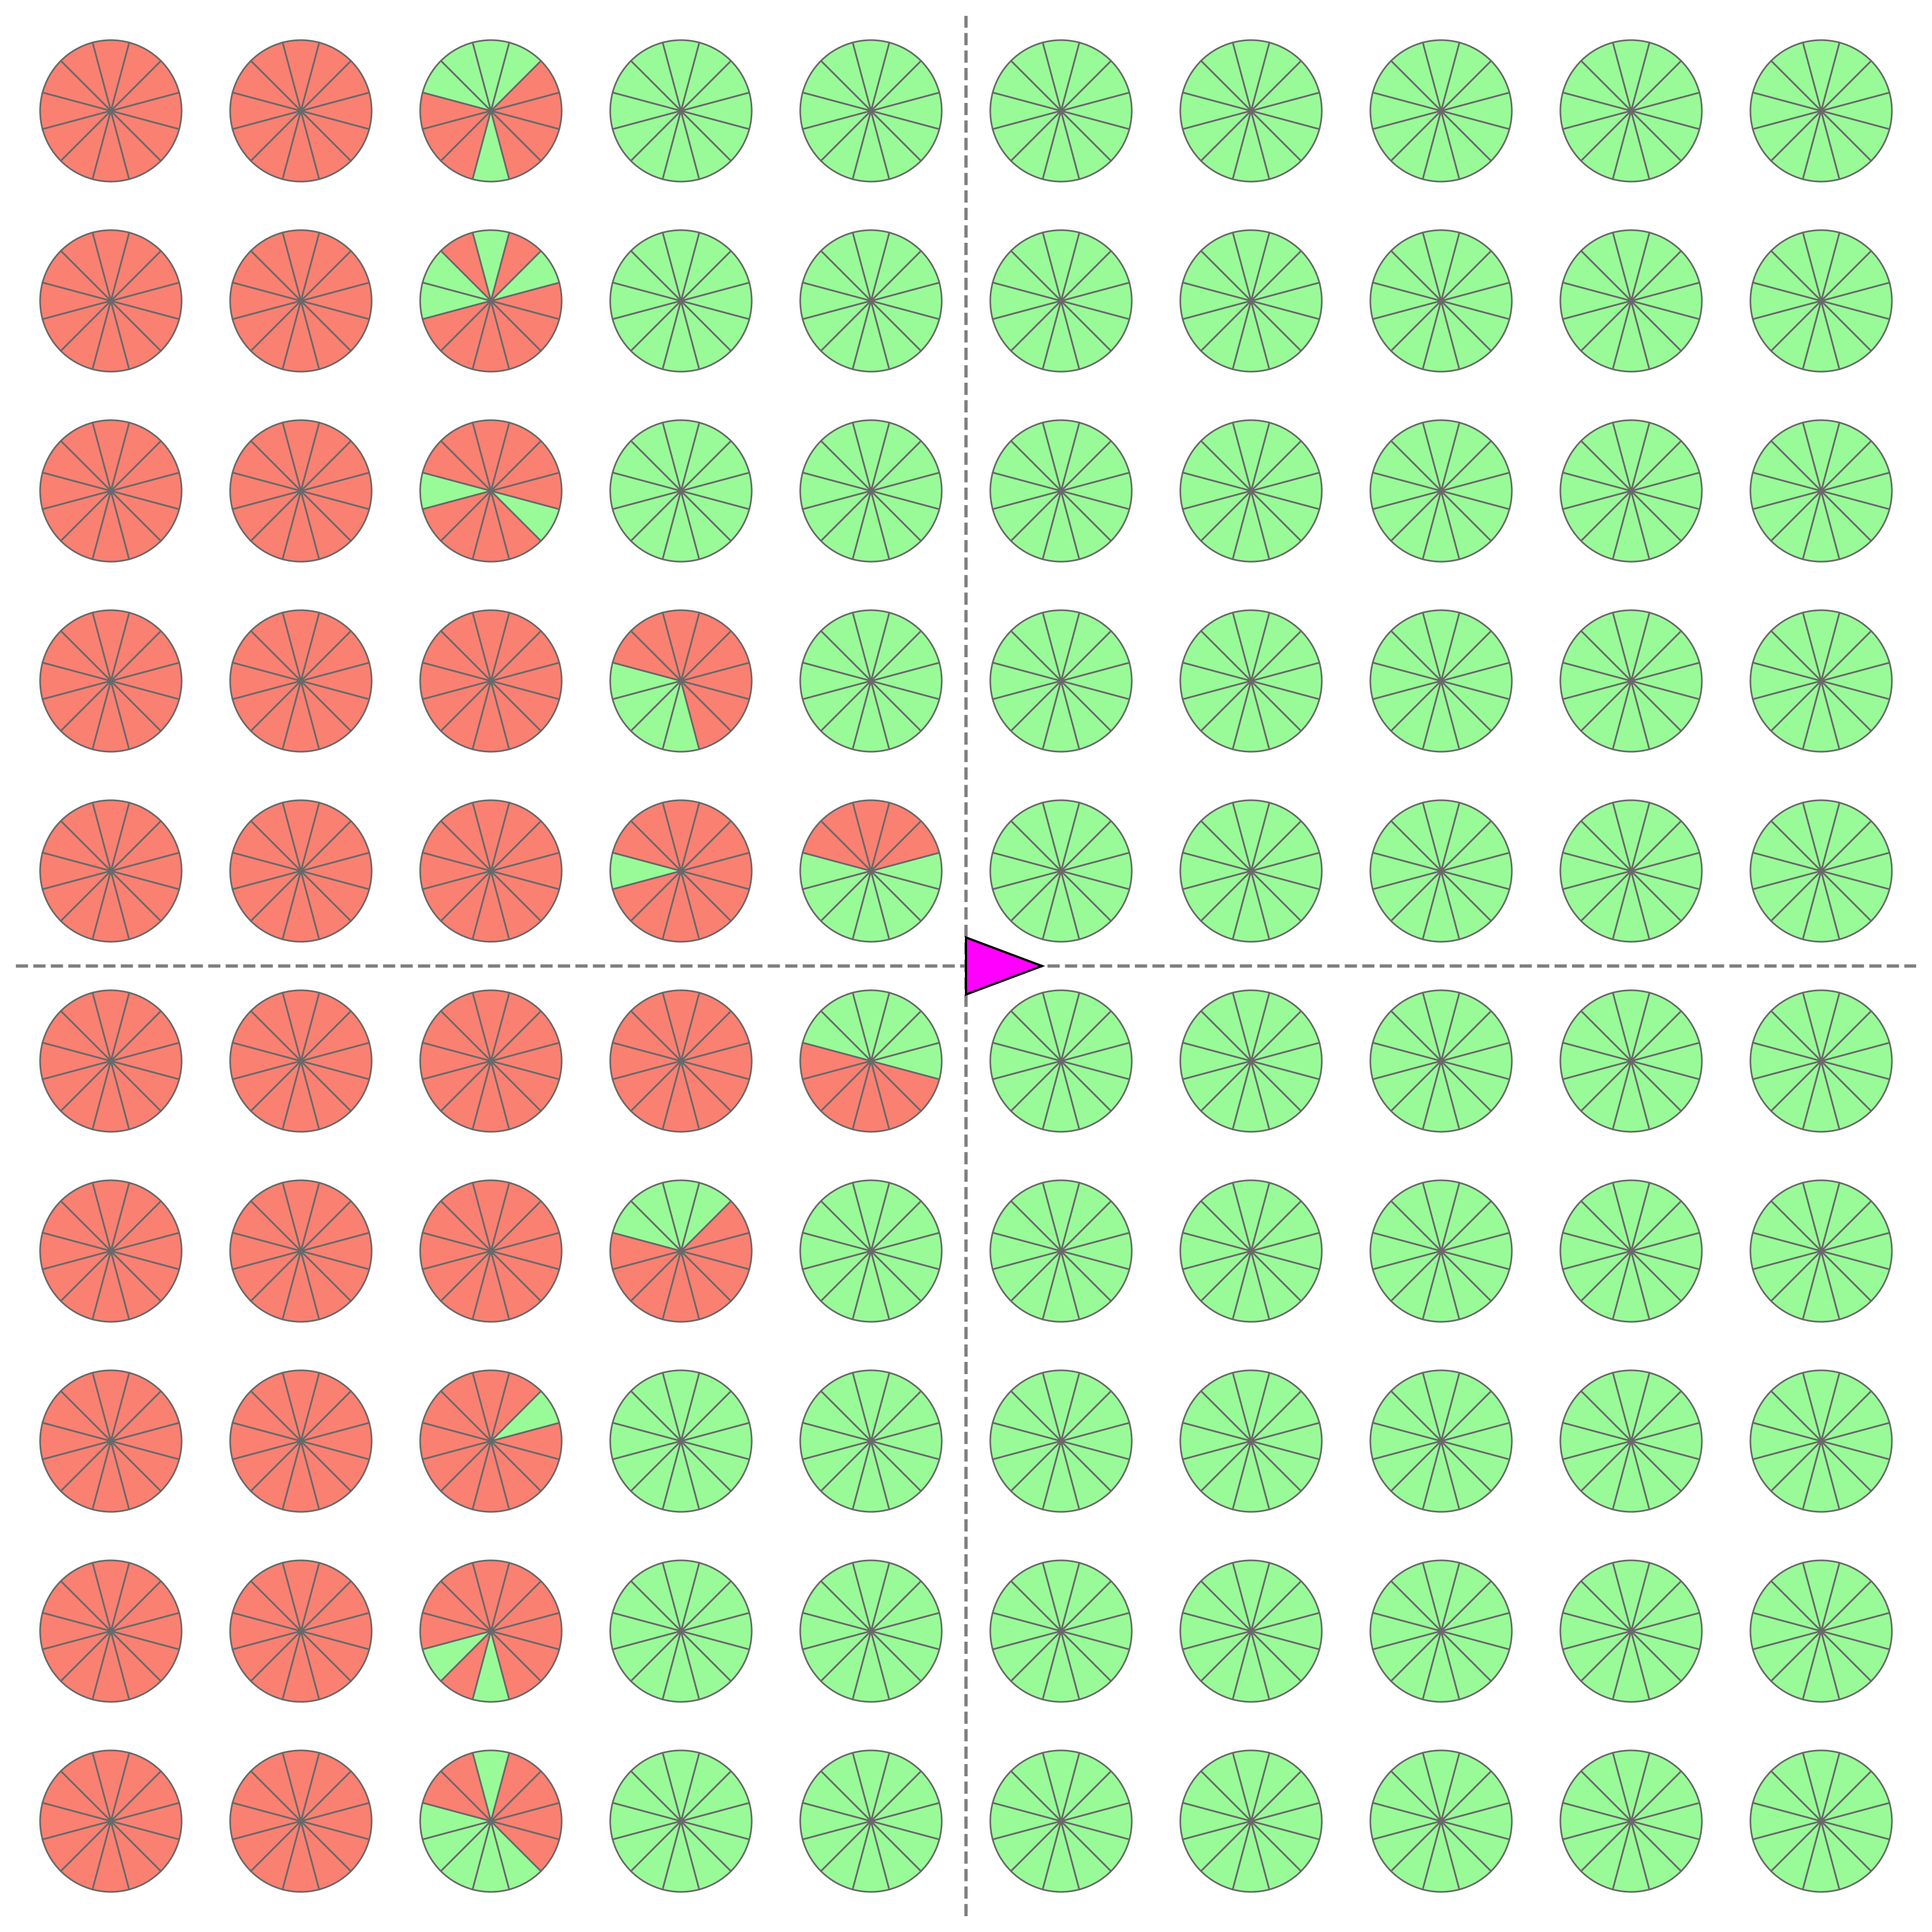

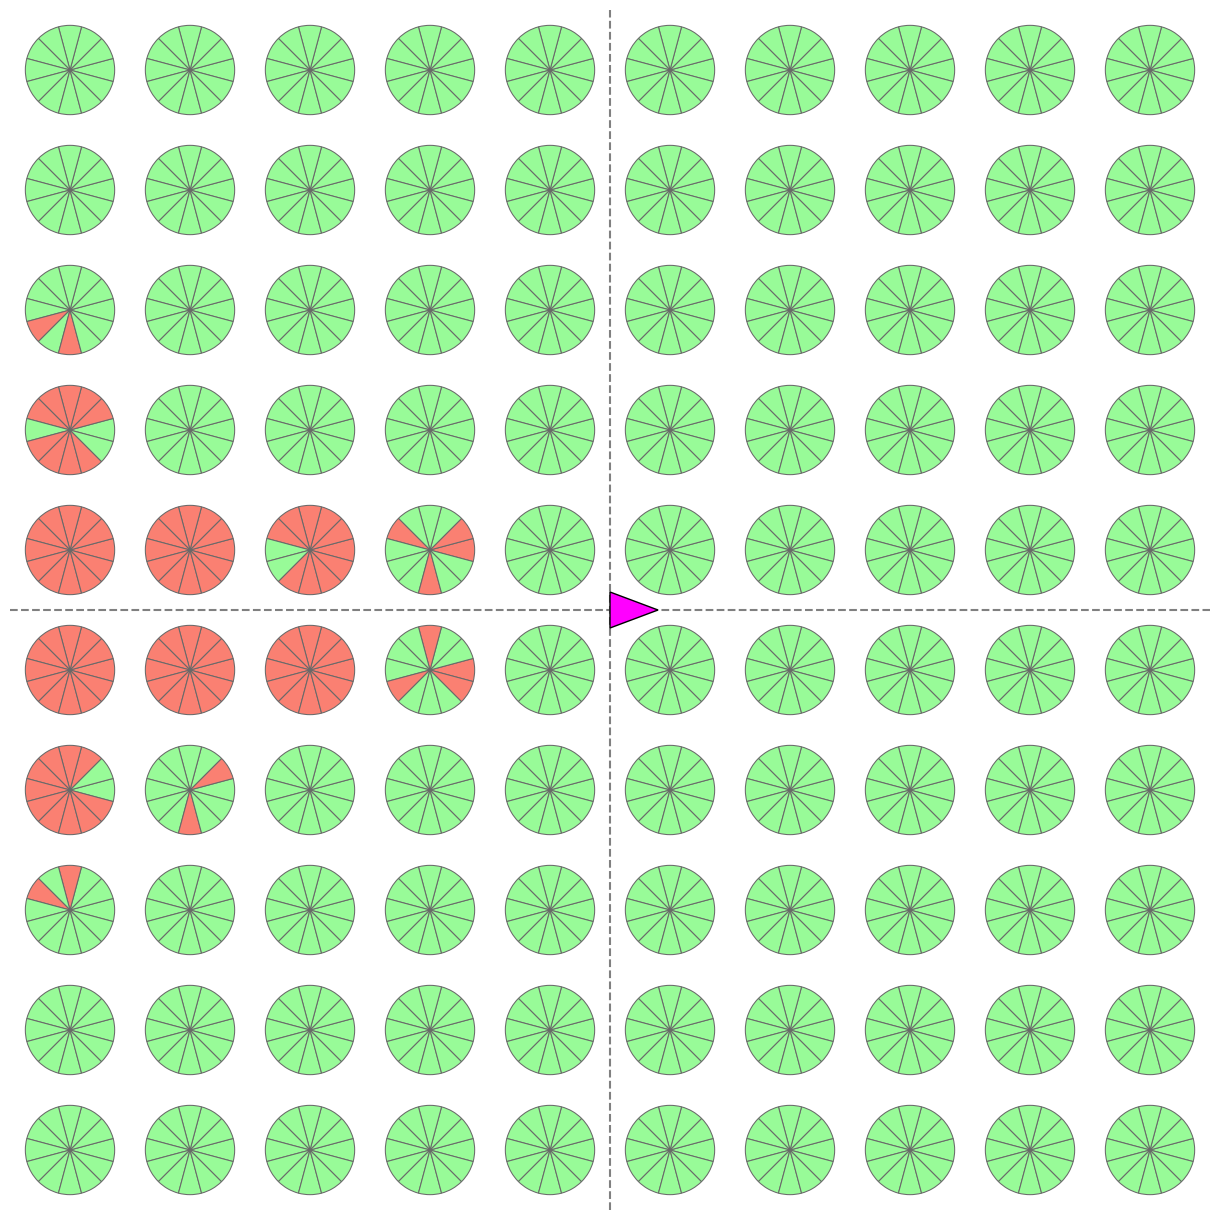

In [4]:
filename = 'grid_results_corrected.csv'


# --- Функция для отрисовки одного "циферблата" ---
def draw_dial(ax, success_data):
    """
    Рисует на оси (ax) круговую диаграмму ("циферблат") на основе 12 значений успеха success_data. Заметим, что
    success_data -- список или numpy array из 12 булевых значений, где i-ое говорит о том, нашлась ли траектория с
    i-ым конечыным направлением (центр циферблата соответствует координатам конечного состояния для траектории, а
    напраление в нём -- одно из 12 равномерно распредлённых: 0, 30, 30, 90, ... градусов --> каждому направлению
    сопоставляем сектор циферблата). Если да -- окрашиваем сектор зелёным (иначе красным).
    """
    if len(success_data) != 12:
        ax.set_xticks([])
        ax.set_yticks([])
        return
    colors = ['palegreen' if s else 'salmon' for s in success_data]  # Цвета: светло-зеленый для успеха, светло-красный для провала
    sizes = np.ones(12)                                              # Все сектора имеют одинаковый размер
    ax.pie(sizes, colors=colors, startangle=-15, counterclock=True,
           wedgeprops={'edgecolor': 'dimgray', 'linewidth': 0.75})   # Поворачиваем всю диаграмму на startangle=-15 градусов (половина сектора),
                                                                     # чтобы центры секторов совпали с нужными углами направления (0, 30, 60...).
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])


# --- Функция для создания визуализации ---
def create_reachability_plot(fig, axes, data_column_name, title):
    """
    Заполняет сетку циферблатами и рисует центральные оси и стрелку (соответствующую начальному состоянию).
    data_column_name: Название столбца в DataFrame для данных ('baseline_success' или 'proposed_success').
    """
    # fig.suptitle(title, fontsize=16, weight='bold', y=0.98)  # Можно было бы заголовок нарисовать

    # Рисуем все 100 циферблатов
    for i in range(10):
        for j in range(10):
            cell_data = df[(df['cell_i'] == i) & (df['cell_j'] == j)].sort_values('angle_idx')
            successes = cell_data[data_column_name].values  # Получаем данные (результаты нахождения траектории) для циферблата с индексом (i,j)
            ax = axes[9 - i, j] # Ось Y идет снизу вверх
            draw_dial(ax, successes)

    # --- ГЛАВНЫЙ ТРЮК: Оверлей с системой координат сетки ---
    ax_overlay = fig.add_axes([0, 0, 1, 1], frameon=False)  # Создаем невидимые оси, покрывающие всю фигуру
    ax_overlay.set_xlim(0, 10)                              # Устанавливаем пределы от 0 до 10, чтобы они соответствовали индексам сетки
    ax_overlay.set_ylim(0, 10)
    ax_overlay.axvline(x=5, color='gray', linestyle='--', linewidth=1.5, zorder=50)  # Рисуем центральные линии. Они будут идеально между 5-м и 6-м рядом/столбцом
    ax_overlay.axhline(y=5, color='gray', linestyle='--', linewidth=1.5, zorder=50)

    # Рисуем стрелку точно из центра (5, 5). Эта стрелка обозначает начальное состояние (оно было посередине), из которого мы пытались
    # генерировать траекторию во все другие состояния (координаты которых соответствуют центрам циферблатов, а направления
    # в которых -- центрам секторов циферблатов). Направление стрелки -- нулевое, это было начальным направлением.
    ax_overlay.arrow(
        x=5.0, y=5.0, dx=0.4, dy=0.0,  # dx=0.4 означает, что длина стрелки будет 0.4 "ячейки"
        fc="magenta", ec="black",      # Цвета
        width=0.08,                    # Ширина стержня в координатах оверлея
        head_width=0.3,                # Ширина головы стрелки
        head_length=0.4,               # Длина её
        length_includes_head=True,
        zorder=100                     # Рисуем поверх всего
    )
    
    ax_overlay.set_axis_off()  # Прячем все от оверлея, кроме наших линий и стрелки

    
# --- Загрузка данных ---
try:
    df = pd.read_csv(filename)
    print(f"Данные из '{filename}' успешно загружены. Записей: {len(df)}")
except FileNotFoundError:
    print(f"Файл '{filename}' не найден. Сначала запустите скрипт run_grid_experiment.py")
    df = pd.DataFrame()


# --- Создание, сохранение и отображение двух графиков ---
if not df.empty:
    # --- График для Baseline-метода ---
    fig_baseline, axes_baseline = plt.subplots(10, 10, figsize=(12, 12), constrained_layout=True, dpi=300)
    create_reachability_plot(fig_baseline, axes_baseline, 'baseline_success', 'Достижимость: Baseline Метод')
    # plt.savefig("baseline_reachability.png", dpi=300, bbox_inches="tight", facecolor='white')

    # --- График для Proposed-метода ---
    fig_proposed, axes_proposed = plt.subplots(10, 10, figsize=(12, 12), constrained_layout=True)
    create_reachability_plot(fig_proposed, axes_proposed, 'proposed_success', 'Достижимость: Предложенный Метод')
    # plt.savefig("proposed_reachability.png", dpi=300, bbox_inches="tight", facecolor='white')

    # Показываем оба графика в ноутбуке
    plt.show()